In [10]:
# which environment am I running
# make sure you're running '/Users/EdwardLeardi/anaconda3/envs/spacenet/bin/python'
import sys
print(sys.executable)

# get current working directory
import os
os.getcwd()

/Users/EdwardLeardi/anaconda3/envs/spacenet/bin/python


'/Users/EdwardLeardi/Desktop/Satellite_Imagery_Research/code/spacenet_sample'

In [11]:
import json
from shapely.geometry import Polygon, shape, Point
import numpy as np
import sys
import gdal

In [49]:
# argv returns list of parameters passed to interpretter when running python script
#fn = sys.argv[1] # file name of picture?
#path = sys.argv[2] # path to picture? 

#8band file: MUL-PanSharpen_AOI_4_Shanghai_img1360.tif
#3band file: RGB-PanSharpen_AOI_4_Shanghai_img1360.tif
#geojson file: buildings_AOI_4_Shanghai_img1360.geojson

# replace above vars with 
fn = 'AOI_4_Shanghai_img2095' 
path = 'SpaceNet_Buildings_Competition_Round2_Sample/AOI_4_Shanghai_Train/'

In [50]:
# import matrix that represents pixels in the input image
def Pixel2World(geoMatrix, i, j): 
    ulX = geoMatrix[0]
    ulY = geoMatrix[3]
    xDist = geoMatrix[1]
    yDist = geoMatrix[5]
    rtnX = geoMatrix[2]
    rtnY = geoMatrix[4]
    return (1.0 * i * xDist  + ulX, -1.0 * j * xDist + ulY)

In [51]:
ds8 = gdal.Open(path+'MUL-PanSharpen/'+'MUL-PanSharpen_'+fn+'.tif') #assign 8-band geoTIFF image to var ds8
ds3 = gdal.Open(path+'RGB-PanSharpen/'+'RGB-PanSharpen_'+fn+'.tif') #assign 3-band geoTIFF image to var ds3
geoTrans = ds8.GetGeoTransform()

In [52]:
with open(path + 'geojson/buildings/'+'buildings_'+fn+'.geojson','r') as f: #import geoJSON file with building footprint represented as polygon
    js = json.load(f)
    dist = np.zeros((ds8.RasterXSize, ds8.RasterYSize))
    for i in range(ds8.RasterXSize):
        for j in range(ds8.RasterYSize):
            point = Point(Pixel2World( geoTrans, i , j ))
            pd = -100000.0
            for feature in js['features']:
                polygon = shape(feature['geometry'])
                newpd = point.distance(polygon.boundary)
                if False == polygon.contains(point):
                    newpd = -1.0 * newpd
                if newpd > pd :
                    pd = newpd
            dist[i,j] = pd

In [53]:
np.save(path+fn+'.distance',dist)

In [56]:
distMap = np.load(path+fn+'.distance'+'.npy')
print(distFile.shape)

# Matplotlib may be flipping or rotating the image! 
#distFile = np.fliplr(distFile)
distMap = np.rot90(distMap, k=1)

(650, 650)


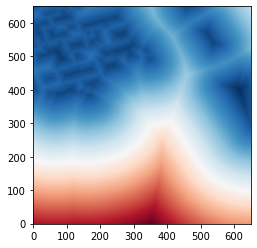

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(distMap, cmap='RdBu', interpolation='nearest', origin='lower')
plt.show()